## 📌 Problem Statement

**Design engineers are evaluating the pressure drop and flow regime in a horizontal pipeline transporting a gas–liquid mixture of methane and water.**
The system is part of a natural gas processing plant, where condensed water is carried along with the gas stream. The pipeline section under study is 50 m long and has an internal diameter of 0.1 m.

### Given Data:

* **Pipeline length (L):** 50 m
* **Pipe internal diameter (D):** 0.1 m
* **Pipe roughness (ε):** 0.000045 m (carbon steel)
* **Operating pressure:** 20 bar
* **Operating temperature:** 310 K
* **Gas phase:** Methane (CH₄)
* **Liquid phase:** Water (H₂O)
* **Mass flow rate of methane:** 0.5 kg/s
* **Mass flow rate of water:** 0.2 kg/s

### Tasks to Perform Using Python (`fluids` + `chemicals`):

1. **Property Estimation:**

   * Calculate thermophysical properties of methane and water at the given P–T using `chemicals` (density, viscosity, surface tension, etc.).

2. **Superficial Velocities:**

   * Compute superficial liquid velocity (UL) and superficial gas velocity (UG).

3. **Flow Regime Prediction:**

   * Use correlations (e.g., Baker, Mandhane, Taitel–Dukler, etc.) from `fluids.two_phase` to determine the **flow regime** (bubbly, slug, annular, stratified, mist).

4. **Two-Phase Pressure Drop Calculation:**

   * Calculate frictional pressure drop using Lockhart–Martinelli or Friedel correlation.
   * Compare pressure drop from different correlations (if available).

5. **Visualization (optional but impressive):**

   * Plot a flow regime map (superficial liquid vs superficial gas velocity) and mark the operating condition.
   * Show pressure drop vs flow rate sensitivity (e.g., vary gas mass flow).

---

## 🔑 Why this works as a showcase

* **chemicals:** for accurate thermophysical properties of water and methane at real conditions.
* **fluids:** for two-phase correlations, flow maps, and pressure drop models.
* **Engineering relevance:** horizontal pipe with gas–liquid transport is common in oil & gas, petrochemicals, multiphase pipelines.
* **Scalable:** you can later extend it to vertical flow, different fluids, or transient cases.

In [1]:
# ================================
# Two-Phase Flow Analysis
# Methane + Water in Horizontal Pipe
# ================================

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from fluids import two_phase, friction, core
from chemicals import *
from thermo import Chemical

In [2]:
# ================================
# 1. PROBLEM STATEMENT
# ================================
print("=" * 60)
print("TWO-PHASE FLOW ANALYSIS: METHANE-WATER SYSTEM")
print("=" * 60)

# System parameters
print("\n1. PROBLEM DEFINITION")
print("-" * 40)
print("Pipeline length (L): 50 m")
print("Pipe internal diameter (D): 0.1 m")
print("Pipe roughness (ε): 0.000045 m (carbon steel)")
print("Operating pressure: 20 bar")
print("Operating temperature: 310 K")
print("Gas phase: Methane (CH₄)")
print("Liquid phase: Water (H₂O)")
print("Mass flow rate of methane: 0.5 kg/s")
print("Mass flow rate of water: 0.2 kg/s")


TWO-PHASE FLOW ANALYSIS: METHANE-WATER SYSTEM

1. PROBLEM DEFINITION
----------------------------------------
Pipeline length (L): 50 m
Pipe internal diameter (D): 0.1 m
Pipe roughness (ε): 0.000045 m (carbon steel)
Operating pressure: 20 bar
Operating temperature: 310 K
Gas phase: Methane (CH₄)
Liquid phase: Water (H₂O)
Mass flow rate of methane: 0.5 kg/s
Mass flow rate of water: 0.2 kg/s


In [3]:
# ================================
# 2. FLUID PROPERTIES CALCULATION
# ================================
print("\n\n2. FLUID PROPERTIES")
print("-" * 40)

# Operating conditions
P = 20 * 1e5  # Convert bar to Pa
T = 310  # K

# Create Chemical objects
methane = Chemical('methane', T=T, P=P)
water = Chemical('water', T=T, P=P)

# Extract properties
rho_g = methane.rho  # Gas density (kg/m³)
mu_g = methane.mu    # Gas viscosity (Pa·s)
rho_l = water.rho    # Liquid density (kg/m³)
mu_l = water.mu      # Liquid viscosity (Pa·s)
sigma = water.sigma  # Surface tension (N/m)

# Display properties
print(f"Methane density: {rho_g:.2f} kg/m³")
print(f"Methane viscosity: {mu_g:.6f} Pa·s")
print(f"Water density: {rho_l:.2f} kg/m³")
print(f"Water viscosity: {mu_l:.6f} Pa·s")
print(f"Surface tension: {sigma:.4f} N/m")



2. FLUID PROPERTIES
----------------------------------------
Methane density: 12.45 kg/m³
Methane viscosity: 0.000011 Pa·s
Water density: 994.22 kg/m³
Water viscosity: 0.000694 Pa·s
Surface tension: 0.0701 N/m


In [4]:
# ================================
# 3. FLOW PARAMETERS CALCULATION
# ================================
print("\n\n3. FLOW PARAMETERS")
print("-" * 40)

# Mass flow rates
m_gas = 0.5    # kg/s
m_liquid = 0.2 # kg/s
m_total = m_gas + m_liquid
x = m_gas / m_total  # Mass quality

print(f"Total mass flow rate: {m_total:.2f} kg/s")
print(f"Mass quality (x): {x:.3f}")

# Cross-sectional area
D = 0.1  # m
A = np.pi * (D/2)**2  # m²
print(f"Pipe cross-sectional area: {A:.6f} m²")

# Superficial velocities
Q_g = m_gas / rho_g  # Gas volumetric flow rate (m³/s)
Q_l = m_liquid / rho_l  # Liquid volumetric flow rate (m³/s)
U_gs = Q_g / A  # Superficial gas velocity (m/s)
U_ls = Q_l / A  # Superficial liquid velocity (m/s)

print(f"Superficial gas velocity: {U_gs:.3f} m/s")
print(f"Superficial liquid velocity: {U_ls:.5f} m/s")

# Reynolds numbers
Re_g = core.Reynolds(V=U_gs, D=D, rho=rho_g, mu=mu_g)
Re_l = core.Reynolds(V=U_ls, D=D, rho=rho_l, mu=mu_l)

print(f"Gas Reynolds number: {Re_g:.0f}")
print(f"Liquid Reynolds number: {Re_l:.0f}")

# Determine flow regimes
gas_regime = "Turbulent" if Re_g > 2000 else "Laminar"
liquid_regime = "Turbulent" if Re_l > 2000 else "Laminar"

print(f"Gas flow regime: {gas_regime}")
print(f"Liquid flow regime: {liquid_regime}")




3. FLOW PARAMETERS
----------------------------------------
Total mass flow rate: 0.70 kg/s
Mass quality (x): 0.714
Pipe cross-sectional area: 0.007854 m²
Superficial gas velocity: 5.114 m/s
Superficial liquid velocity: 0.02561 m/s
Gas Reynolds number: 555691
Liquid Reynolds number: 3672
Gas flow regime: Turbulent
Liquid flow regime: Turbulent


In [10]:
# ================================
# 4. FLOW REGIME PREDICTION
# ================================
print("\n\n4. FLOW REGIME PREDICTION")
print("-" * 40)

# Use Mandhane-Gregory-Aziz method
regime, v_gs_ft, v_ls_ft = two_phase.Mandhane_Gregory_Aziz_regime(
    m=m_total,
    x=x,
    rhol=rho_l,
    rhog=rho_g,
    mul=mu_l,
    mug=mu_g,
    sigma=sigma,
    D=D
)

# Convert velocities from ft/s to m/s
v_gs = v_gs_ft/3.28084
v_ls = v_ls_ft/3.28084

print(f"Predicted flow regime: {regime}")
print(f"Superficial gas velocity (from model): {v_gs:.3f} m/s")
print(f"Superficial liquid velocity (from model): {v_ls:.5f} m/s")




4. FLOW REGIME PREDICTION
----------------------------------------
Predicted flow regime: stratified
Superficial gas velocity (from model): 0.026 m/s
Superficial liquid velocity (from model): 5.11417 m/s


In [6]:
# ================================
# 5. PRESSURE DROP CALCULATION
# ================================
print("\n\n5. PRESSURE DROP CALCULATION")
print("-" * 40)

# Calculate Lockhart-Martinelli pressure drop
L = 50  # m
delta_P = two_phase.Lockhart_Martinelli(
    m=m_total,
    x=x,
    rhol=rho_l,
    rhog=rho_g,
    mul=mu_l,
    mug=mu_g,
    D=D,
    L=L
)

print(f"Lockhart-Martinelli pressure drop: {delta_P/1e5:.3f} bar")
print(f"Lockhart-Martinelli pressure drop: {delta_P:.1f} Pa")

# Calculate single-phase pressure drops for comparison
def single_phase_dP(m, rho, mu, D, L):
    """Calculate single-phase pressure drop"""
    A = np.pi * (D/2)**2
    V = m / (rho * A)
    Re = core.Reynolds(V=V, D=D, rho=rho, mu=mu)
    f = friction.friction_factor(Re=Re, eD=0.000045/D)  # Using given roughness
    dP = f * (L/D) * (rho * V**2) / 2
    return dP

dP_gas_only = single_phase_dP(m_gas, rho_g, mu_g, D, L)
dP_liquid_only = single_phase_dP(m_liquid, rho_l, mu_l, D, L)

print(f"\nFor comparison:")
print(f"Gas-only pressure drop: {dP_gas_only/1e5:.4f} bar")
print(f"Liquid-only pressure drop: {dP_liquid_only/1e5:.4f} bar")




5. PRESSURE DROP CALCULATION
----------------------------------------
Lockhart-Martinelli pressure drop: 0.026 bar
Lockhart-Martinelli pressure drop: 2640.2 Pa

For comparison:
Gas-only pressure drop: 0.0140 bar
Liquid-only pressure drop: 0.0001 bar




6. VISUALIZATION
----------------------------------------
Flow regime map saved as 'flow_regime_map.png'
Pressure drop sensitivity plot saved as 'pressure_drop_sensitivity.png'


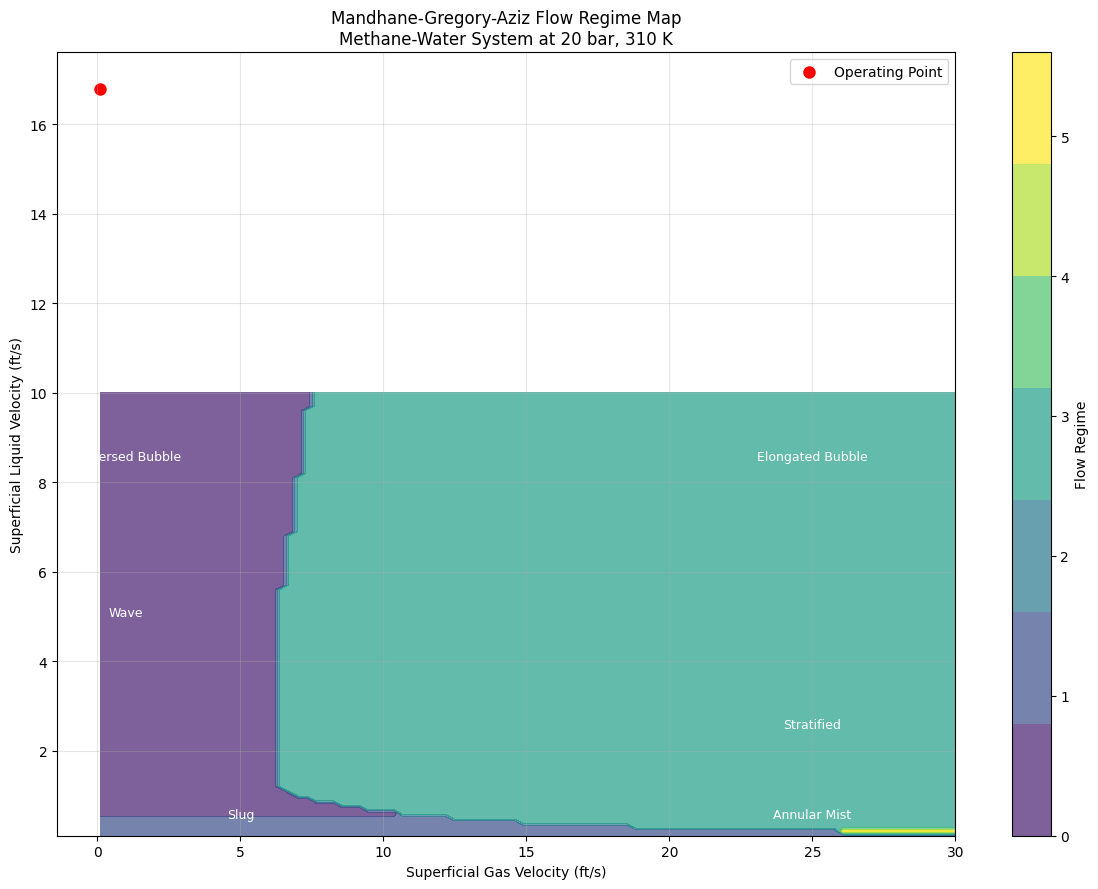

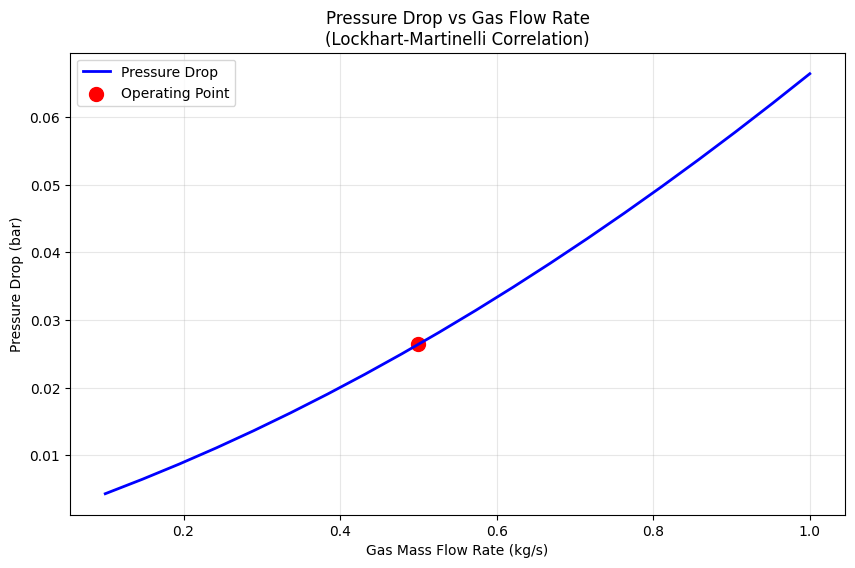

In [7]:
# ================================
# 6. VISUALIZATION
# ================================
print("\n\n6. VISUALIZATION")
print("-" * 40)

# Create flow regime map
U_gs_range_ft = np.linspace(0.1, 30, 100)
U_ls_range_ft = np.linspace(0.1, 10, 100)

regime_map = np.zeros((len(U_ls_range_ft), len(U_gs_range_ft)), dtype=object)

for i, U_ls_val in enumerate(U_ls_range_ft):
    for j, U_gs_val in enumerate(U_gs_range_ft):
        # Convert to approximate mass flow rates
        v_ls_mps = U_ls_val * 0.3048
        v_gs_mps = U_gs_val * 0.3048
        m_liquid_approx = v_ls_mps * A * rho_l
        m_gas_approx = v_gs_mps * A * rho_g
        m_total_approx = m_liquid_approx + m_gas_approx
        x_approx = m_gas_approx / m_total_approx
        
        regime, _, _ = two_phase.Mandhane_Gregory_Aziz_regime(
            m=m_total_approx,
            x=x_approx,
            rhol=rho_l,
            rhog=rho_g,
            mul=mu_l,
            mug=mu_g,
            sigma=sigma,
            D=D
        )
        regime_map[i, j] = regime

# Convert to numerical values for plotting
regime_to_num = {
    'elongated bubble': 0,
    'stratified': 1,
    'annular mist': 2,
    'slug': 3,
    'dispersed bubble': 4,
    'wave': 5
}
regime_num_map = np.vectorize(regime_to_num.get)(regime_map)

# Create the plot
plt.figure(figsize=(12, 9))
U_gs_mesh, U_ls_mesh = np.meshgrid(U_gs_range_ft, U_ls_range_ft)

contour = plt.contourf(U_gs_mesh, U_ls_mesh, regime_num_map, cmap='viridis', alpha=0.7)
plt.colorbar(contour, label='Flow Regime', ticks=[0, 1, 2, 3, 4, 5])
plt.clim(0, 5)

# Mark the operating point
plt.scatter(v_gs_ft, v_ls_ft, color='red', s=100, label='Operating Point', edgecolors='white')

# Add labels and title
plt.xlabel('Superficial Gas Velocity (ft/s)')
plt.ylabel('Superficial Liquid Velocity (ft/s)')
plt.title('Mandhane-Gregory-Aziz Flow Regime Map\nMethane-Water System at 20 bar, 310 K')
plt.legend()
plt.grid(True, alpha=0.3)

# Add regime labels
regime_labels = {
    0: 'Elongated Bubble',
    1: 'Stratified',
    2: 'Annular Mist',
    3: 'Slug',
    4: 'Dispersed Bubble',
    5: 'Wave'
}

# Add text annotations for each regime
plt.text(25, 8.5, regime_labels[0], fontsize=9, ha='center', color='white')
plt.text(25, 2.5, regime_labels[1], fontsize=9, ha='center', color='white')
plt.text(25, 0.5, regime_labels[2], fontsize=9, ha='center', color='white')
plt.text(5, 0.5, regime_labels[3], fontsize=9, ha='center', color='white')
plt.text(1, 8.5, regime_labels[4], fontsize=9, ha='center', color='white')
plt.text(1, 5, regime_labels[5], fontsize=9, ha='center', color='white')

plt.tight_layout()
plt.savefig('flow_regime_map.png', dpi=300, bbox_inches='tight')
print("Flow regime map saved as 'flow_regime_map.png'")

# Pressure drop sensitivity analysis
m_gas_range = np.linspace(0.1, 1.0, 20)
delta_P_range = []

for m_g in m_gas_range:
    m_total_var = m_g + m_liquid
    x_var = m_g / m_total_var
    
    dP = two_phase.Lockhart_Martinelli(
        m=m_total_var,
        x=x_var,
        rhol=rho_l,
        rhog=rho_g,
        mul=mu_l,
        mug=mu_g,
        D=D,
        L=L
    )
    delta_P_range.append(dP)

# Create pressure drop sensitivity plot
plt.figure(figsize=(10, 6))
plt.plot(m_gas_range, np.array(delta_P_range)/1e5, 'b-', linewidth=2, label='Pressure Drop')
plt.scatter(m_gas, delta_P/1e5, color='red', s=100, label='Operating Point')
plt.xlabel('Gas Mass Flow Rate (kg/s)')
plt.ylabel('Pressure Drop (bar)')
plt.title('Pressure Drop vs Gas Flow Rate\n(Lockhart-Martinelli Correlation)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('pressure_drop_sensitivity.png', dpi=300, bbox_inches='tight')
print("Pressure drop sensitivity plot saved as 'pressure_drop_sensitivity.png'")

plt.show()

In [8]:
# ================================
# 7. SUMMARY
# ================================
print("\n\n7. ANALYSIS SUMMARY")
print("-" * 40)
print(f"Flow regime: {regime}")
print(f"Pressure drop: {delta_P/1e5:.3f} bar over {L} m pipe length")
print(f"Superficial gas velocity: {U_gs:.3f} m/s")
print(f"Superficial liquid velocity: {U_ls:.5f} m/s")

print("\nAnalysis complete. Check generated plots for visualization.")



7. ANALYSIS SUMMARY
----------------------------------------
Flow regime: slug
Pressure drop: 0.026 bar over 50 m pipe length
Superficial gas velocity: 5.114 m/s
Superficial liquid velocity: 0.02561 m/s

Analysis complete. Check generated plots for visualization.
